# A connectivity-based algorithm: Agglomerative clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)
sns.set_theme()
sns.set_context("talk")

# Toy-data generation

In [2]:
from sklearn.datasets import make_blobs, make_moons, make_circles

### Blobs

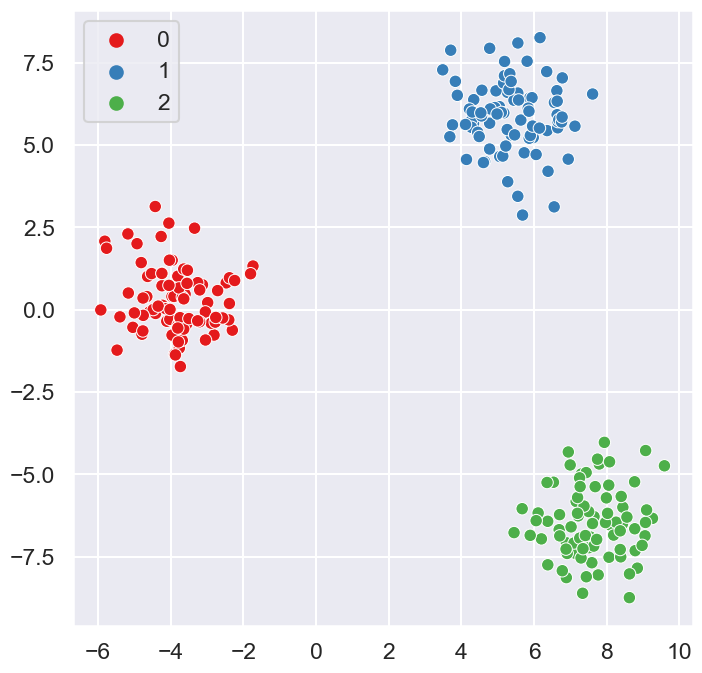

In [3]:
n_points = 250
data_blobs, labels_blobs = make_blobs(n_samples=n_points, n_features=2, centers=3, cluster_std=1, center_box=[-10,10], random_state=26)

sns.scatterplot(x=data_blobs[:, 0], y=data_blobs[:, 1], hue=labels_blobs, palette="Set1")
plt.show()

### Moons

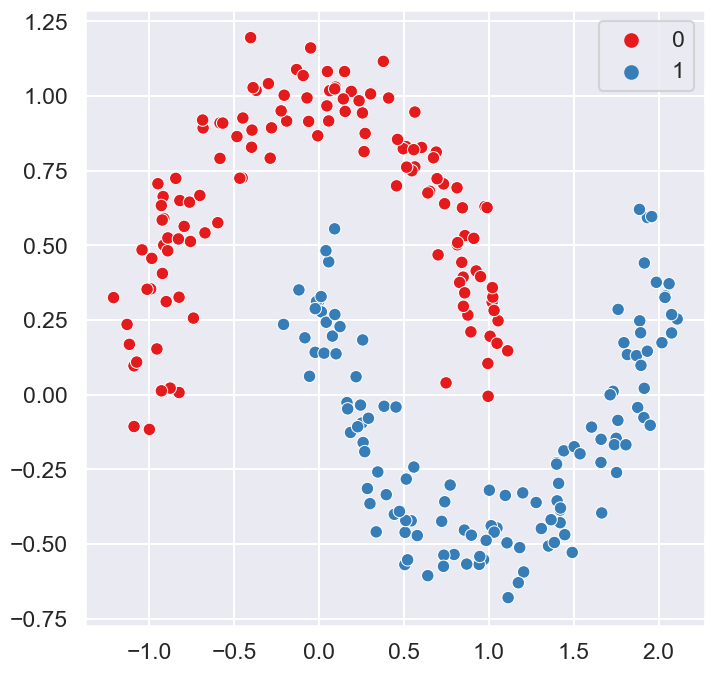

In [4]:
n_points = 250
data_moons, labels_moons = make_moons(n_samples=n_points, noise=.1, random_state=12)

sns.scatterplot(x=data_moons[:, 0], y=data_moons[:, 1], hue=labels_moons, palette="Set1")
plt.show()

### Circles

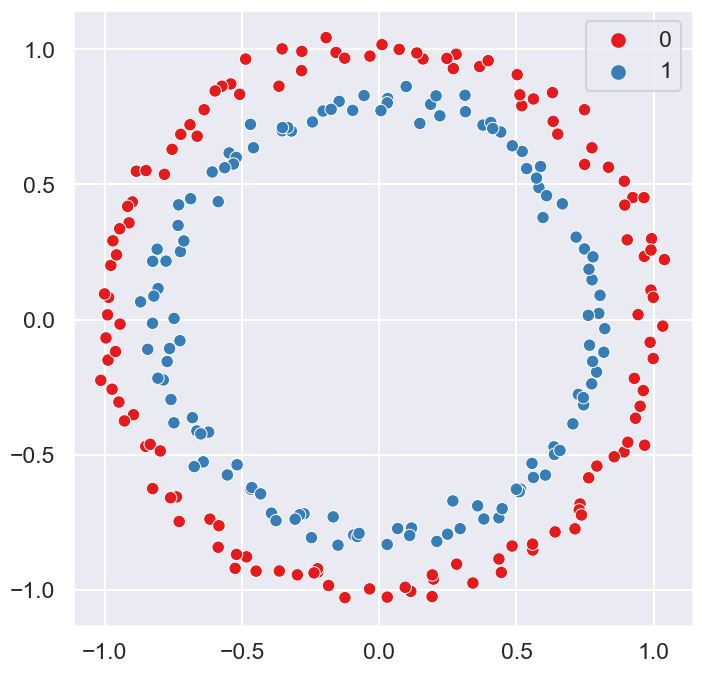

In [5]:
n_points = 250
data_circles, labels_circles = make_circles(n_samples=n_points, noise=.03, random_state=42)

sns.scatterplot(x=data_circles[:, 0], y=data_circles[:, 1], hue=labels_circles, palette="Set1")
plt.show()

# Agglomerative clustering algorithm

__Objective__: Recursively merges pair of clusters of sample data.

## Agglomerative clustering using `scipy`

The [cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) package allows to perform hierarchical classifications.

In [6]:
import scipy.cluster.hierarchy as sch

### Blobs

In [7]:
data = data_blobs

#### Dendrogram

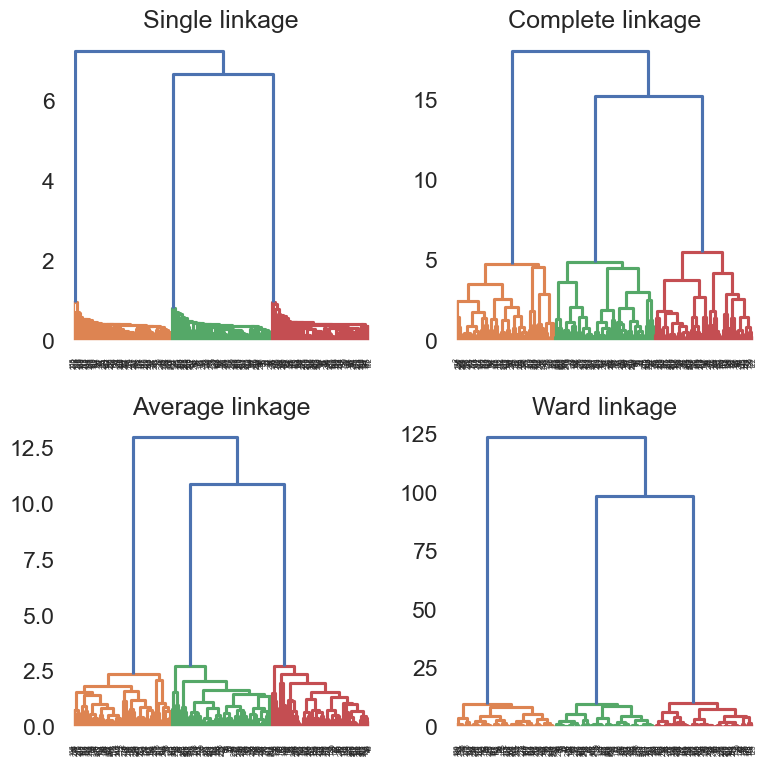

In [8]:
plt.subplot(2,2,1)
link = sch.linkage(data, method ='single', metric='euclidean')
sch.dendrogram(link)
plt.title("Single linkage")

plt.subplot(2,2,2)
link = sch.linkage(data, method ='complete', metric='euclidean')
sch.dendrogram(link)
plt.title("Complete linkage")

plt.subplot(2,2,3)
link = sch.linkage(data, method ='average', metric='euclidean')
sch.dendrogram(link)
plt.title("Average linkage")

plt.subplot(2,2,4)
link = sch.linkage(data, method ='ward', metric='euclidean')
sch.dendrogram(link)
plt.title("Ward linkage")

plt.tight_layout()
plt.show()

#### Clustering

In [9]:
from scipy.spatial.distance import pdist

Depending on the truncation value ($t=10$ here) and the type of link (Single, Complete, ...), different classifications are obtained.

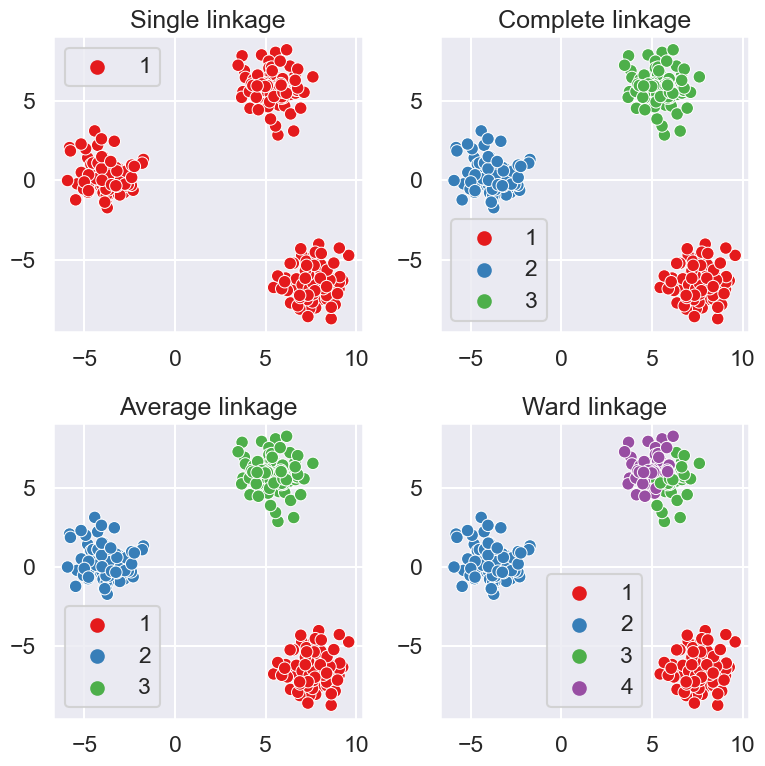

In [10]:
dist = sch.single(pdist(data))
clusters = sch.fcluster(dist, t=10, criterion='distance')

plt.subplot(2,2,1)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
plt.title("Single linkage")

# --- #

dist = sch.complete(pdist(data))
clusters = sch.fcluster(dist, t=10, criterion='distance')

plt.subplot(2,2,2)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
plt.title("Complete linkage")

# --- #

dist = sch.average(pdist(data))
clusters = sch.fcluster(dist, t=10, criterion='distance')

plt.subplot(2,2,3)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
plt.title("Average linkage")

# --- #

dist = sch.ward(pdist(data))
clusters = sch.fcluster(dist, t=10, criterion='distance')

plt.subplot(2,2,4)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
plt.title("Ward linkage")

# --- #

plt.tight_layout()
plt.show()

#### Cut tree

The `cut_tree` function allows to cut the dendrogram in order to have $\texttt{n_clusters}$ clusters.

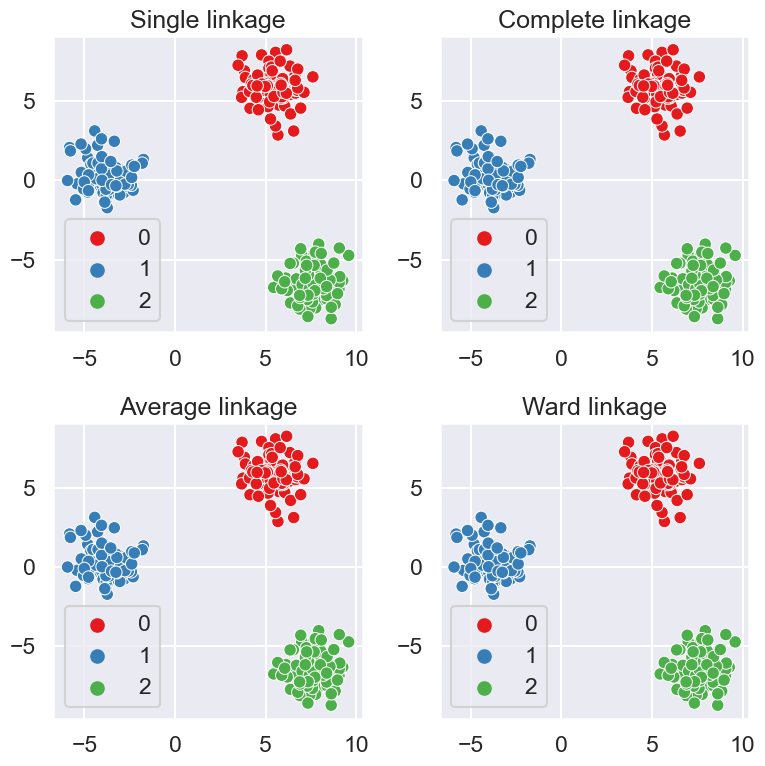

In [11]:
K = 3

dist = sch.single(pdist(data))
clusters = sch.cut_tree(dist, n_clusters=K).reshape(-1)

plt.subplot(2,2,1)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
plt.title("Single linkage")

# --- #

dist = sch.complete(pdist(data))
clusters = sch.cut_tree(dist, n_clusters=K).reshape(-1)

plt.subplot(2,2,2)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
plt.title("Complete linkage")

# --- #

dist = sch.average(pdist(data))
clusters = sch.cut_tree(dist, n_clusters=K).reshape(-1)

plt.subplot(2,2,3)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
plt.title("Average linkage")

# --- #

dist = sch.ward(pdist(data))
clusters = sch.cut_tree(dist, n_clusters=K).reshape(-1)

plt.subplot(2,2,4)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
plt.title("Ward linkage")

# --- #

plt.tight_layout()
plt.show()

#### Dendrogram _vs._ Clusters

You can also find the cut height by using `link[:,2]` which contains all the heights. In particular, `link[-k,2]` contains the height of the $k$-th merge, starting at the top.

In [14]:
def plotAC(data, method, K, metric='euclidean'):
    if method == 'single':
        f = sch.single
    elif method == 'complete':
        f = sch.complete
    elif method == 'average':
        f = sch.average
    else:
        f = sch.ward
      
    link = sch.linkage(data, method=method, metric=metric)
    # plt.rcParams["figure.figsize"] = (12, 6)
    plt.rcParams["figure.figsize"] = (8, 4)
    
    plt.subplot(1,2,1)
    sch.dendrogram(link)
    threshold = .5*(link[-K,2]+link[-K+1,2])
    plt.axhline(y=threshold, c='k')
    plt.title('Dendrogram: '+method+' linkage')
    
    plt.subplot(1,2,2)
    dist = f(pdist(data))
    clusters = sch.cut_tree(dist, n_clusters=K).reshape(-1)
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
    plt.title('Clusters: '+method+' linkage')
    
    plt.tight_layout()
    plt.show()

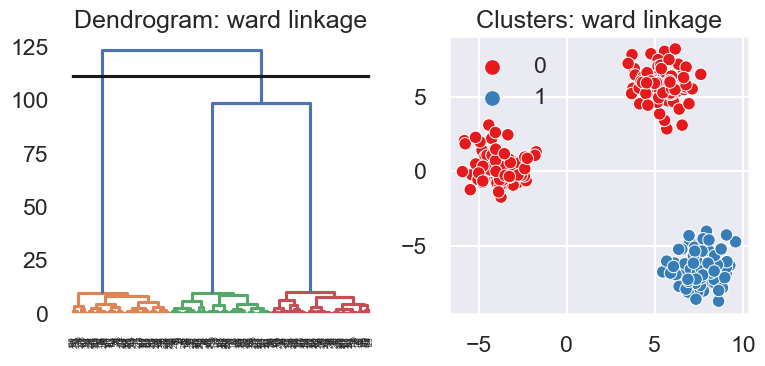

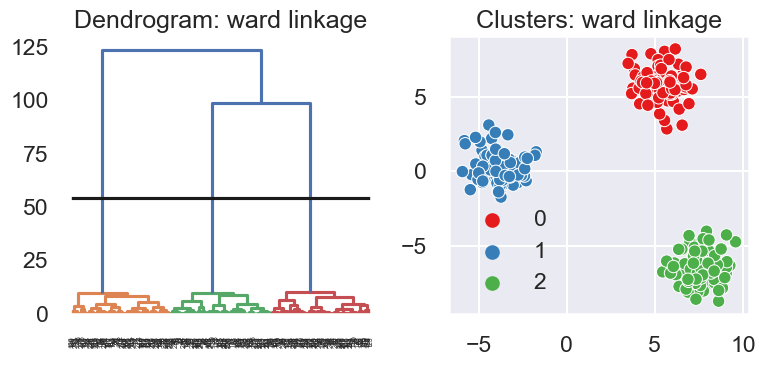

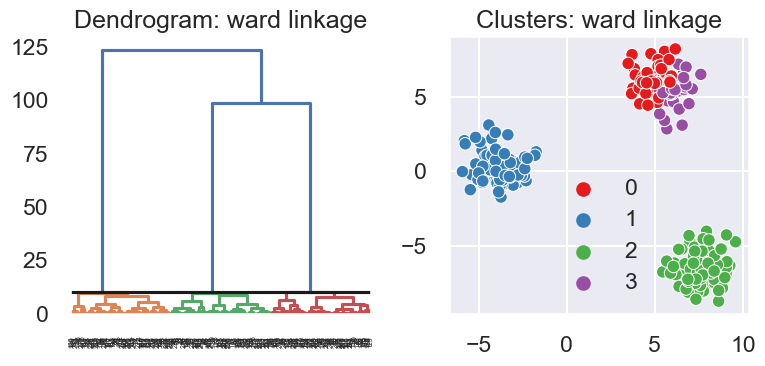

In [35]:
# Effect of cutting height
data = data_blobs

plotAC(data, 'ward', 2)
plotAC(data, 'ward', 3)
plotAC(data, 'ward', 4)
# plotAC(data, 'ward', 5)

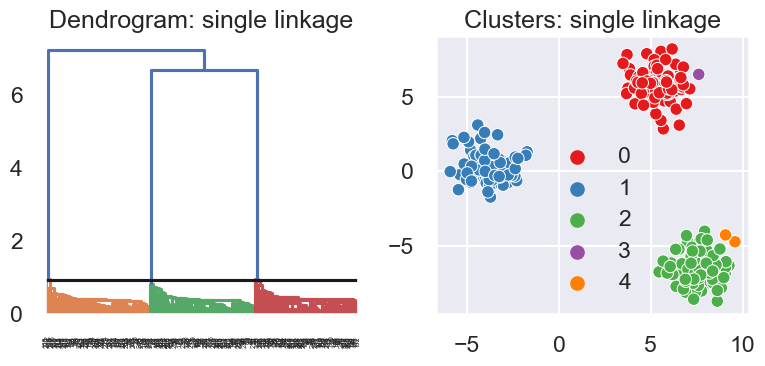

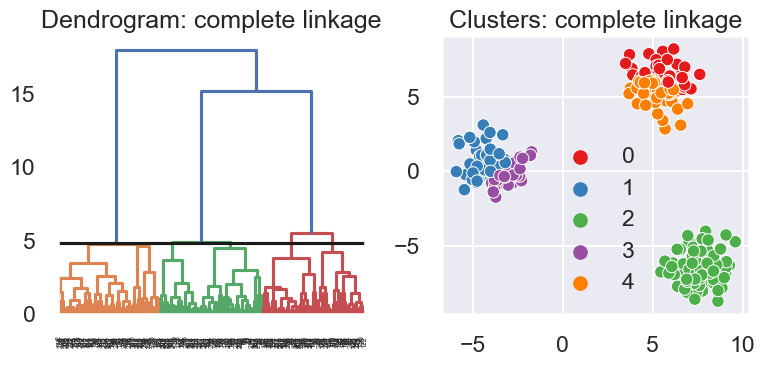

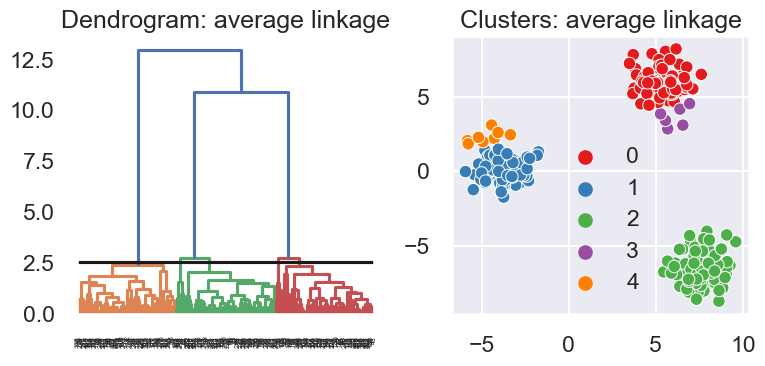

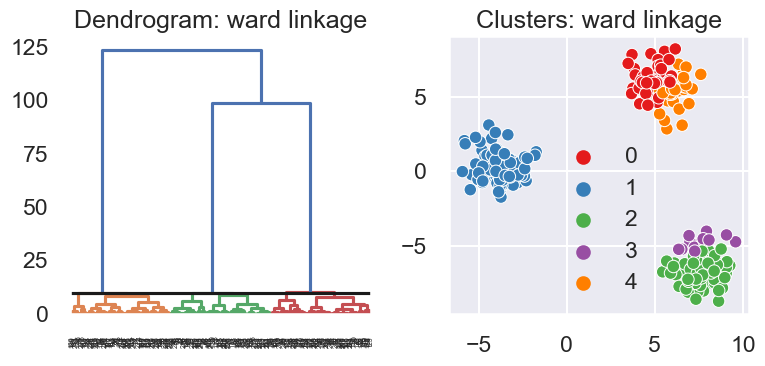

In [46]:
# Effect of the linkage
data = data_blobs

K = 5
plotAC(data, 'single', K)
plotAC(data, 'complete', K)
plotAC(data, 'average', K)
plotAC(data, 'ward', K)

### Moons

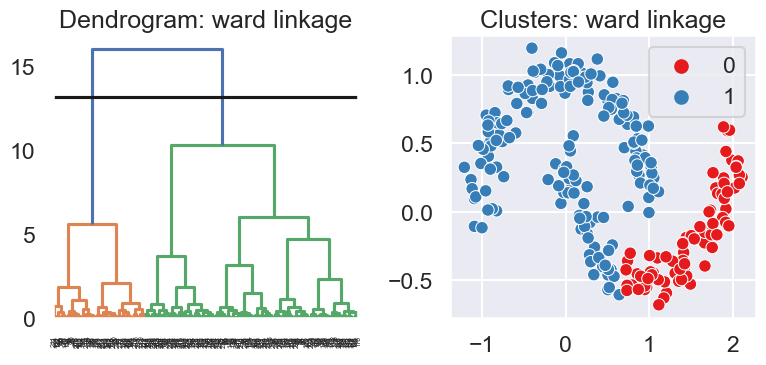

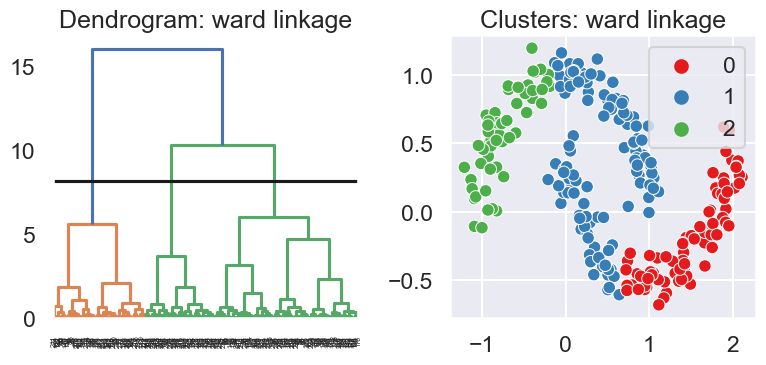

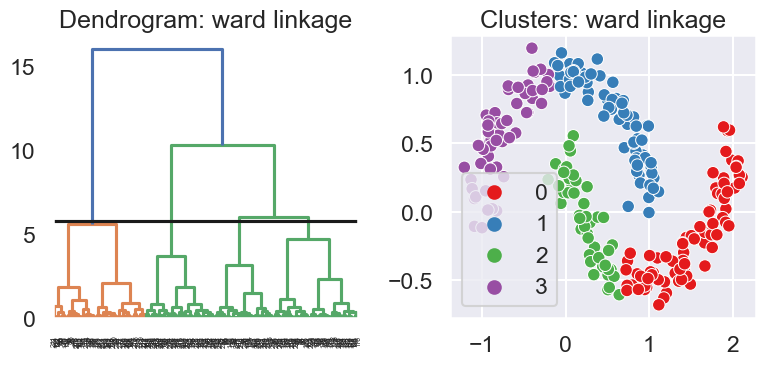

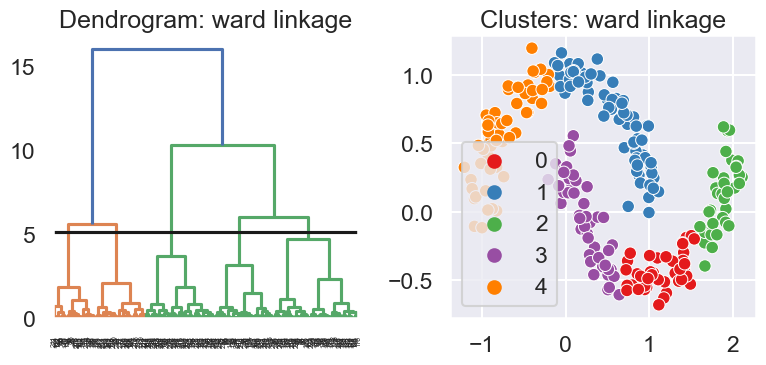

In [17]:
# Effect of cutting height
data = data_moons

plotAC(data, 'ward', 2)
plotAC(data, 'ward', 3)
plotAC(data, 'ward', 4)
plotAC(data, 'ward', 5)

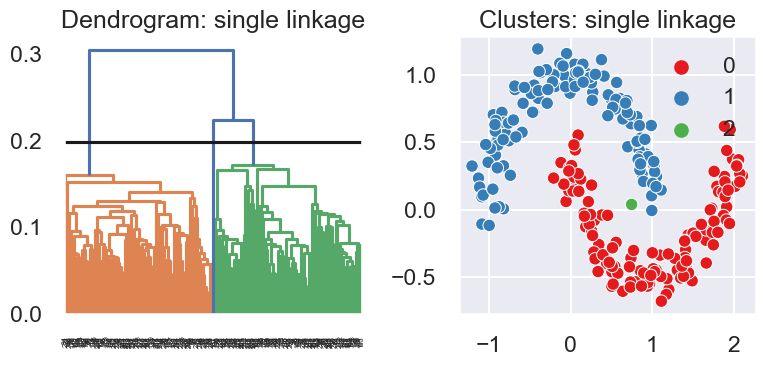

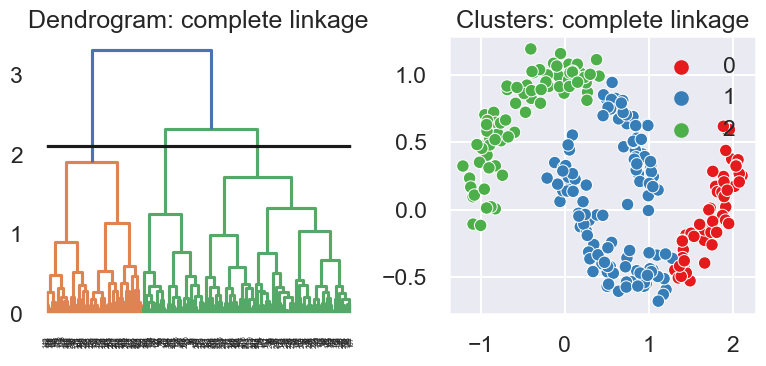

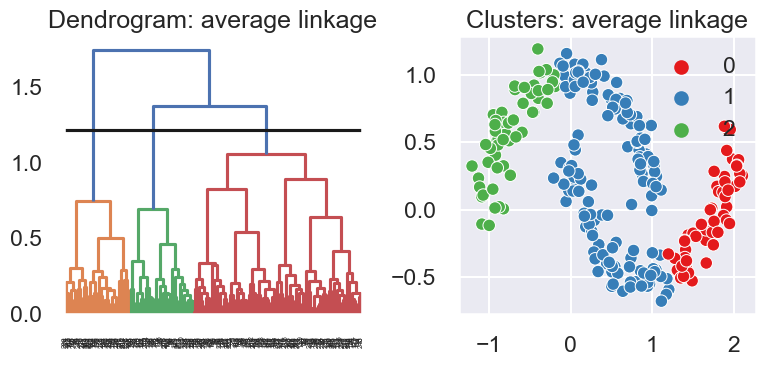

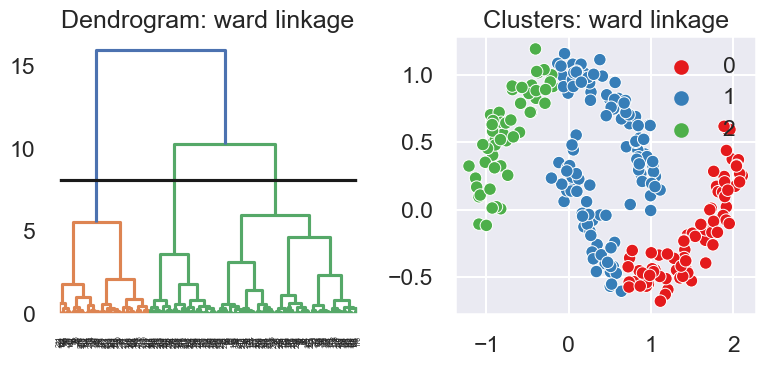

In [49]:
# Effect of the linkage
data = data_moons

K = 3
plotAC(data, 'single', K)
plotAC(data, 'complete', K)
plotAC(data, 'average', K)
plotAC(data, 'ward', K)

### Circles

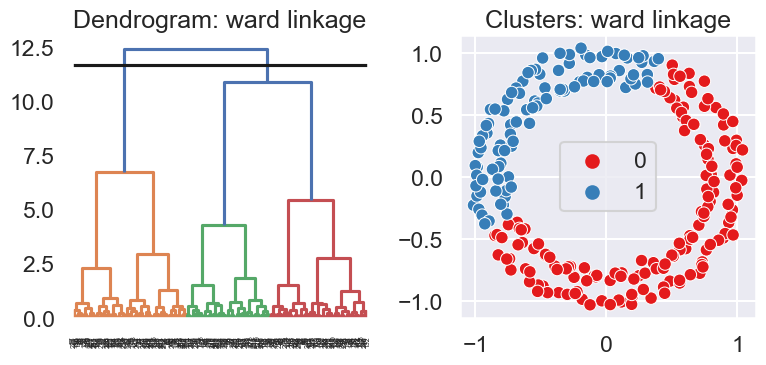

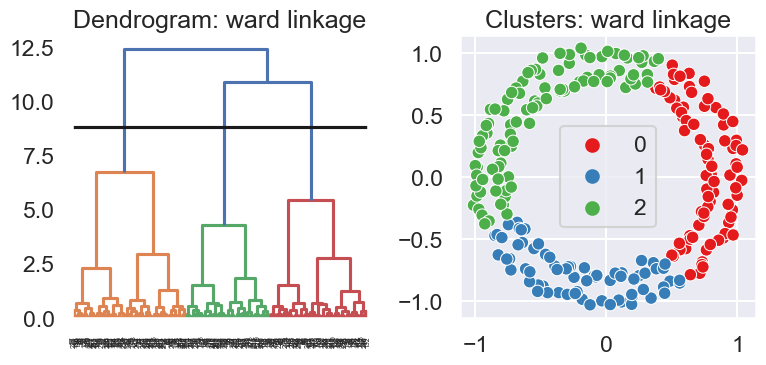

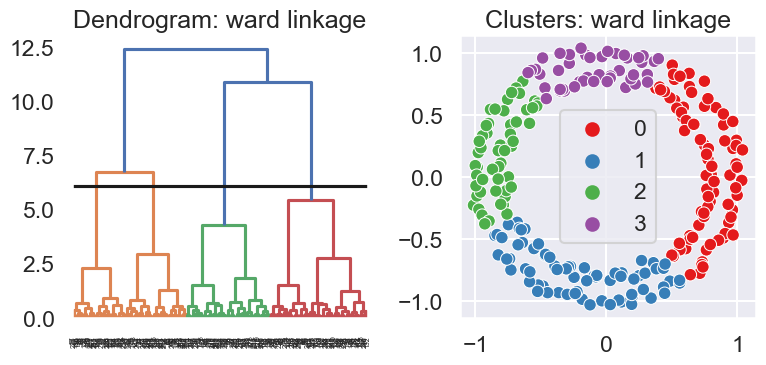

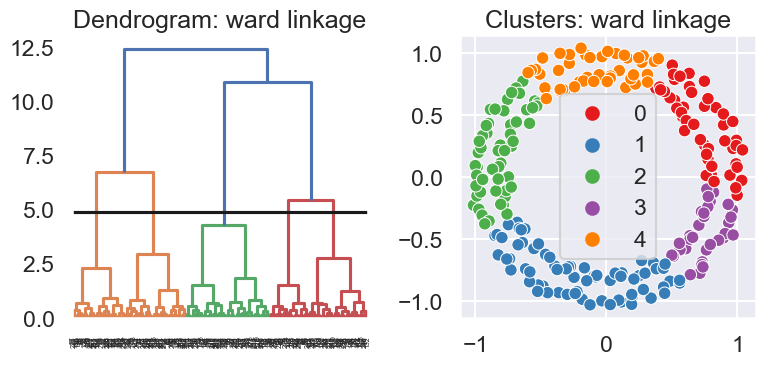

In [19]:
# Effect of cutting height
data = data_circles

plotAC(data, 'ward', 2)
plotAC(data, 'ward', 3)
plotAC(data, 'ward', 4)
plotAC(data, 'ward', 5)

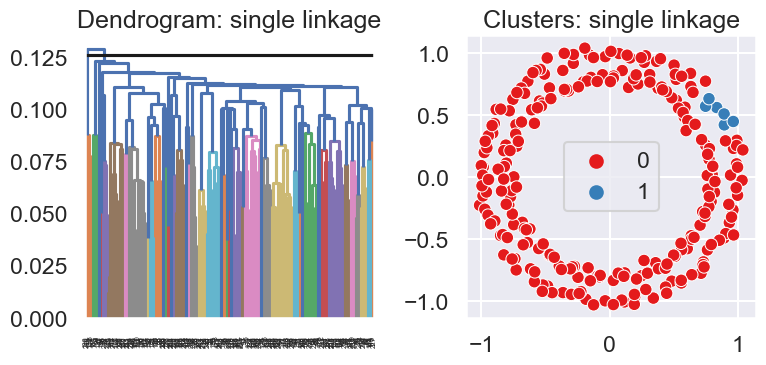

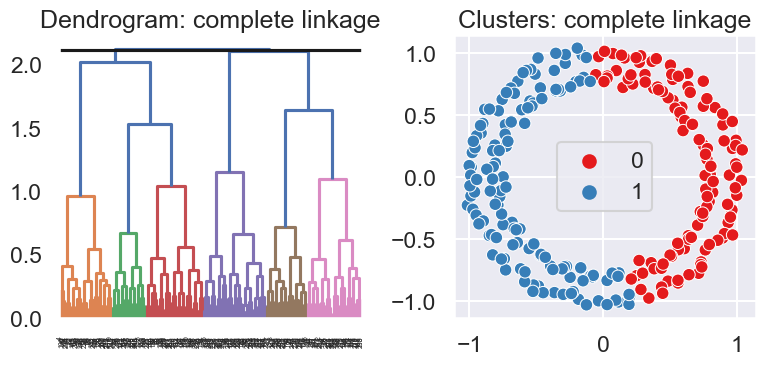

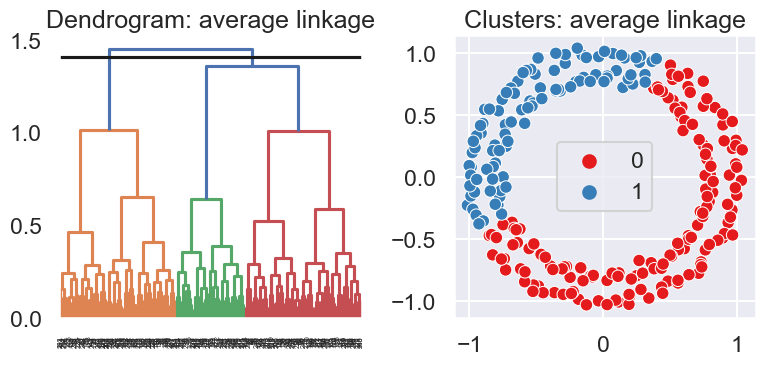

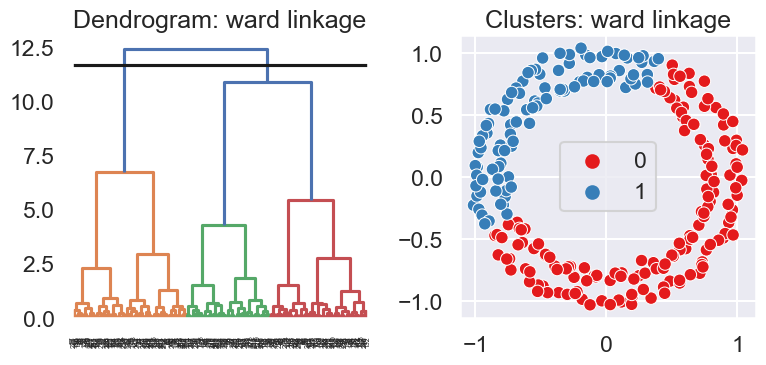

In [20]:
# Effect of the linkage
data = data_circles

K = 2
plotAC(data, 'single', K)
plotAC(data, 'complete', K)
plotAC(data, 'average', K)
plotAC(data, 'ward', K)

## Agglomerative clustering using `scikit-learn`

In [21]:
from sklearn.cluster import AgglomerativeClustering

### Blobs

In [22]:
data = data_blobs
K = 3

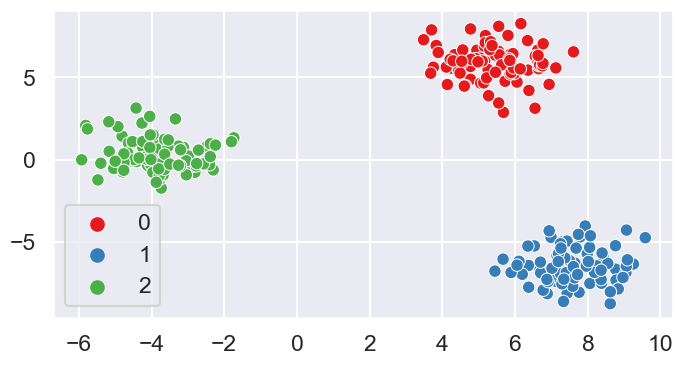

In [24]:
# Clustering with K=3

ac = AgglomerativeClustering(linkage='ward', n_clusters=K)
clusters = ac.fit_predict(data)

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette="Set1")
plt.show()

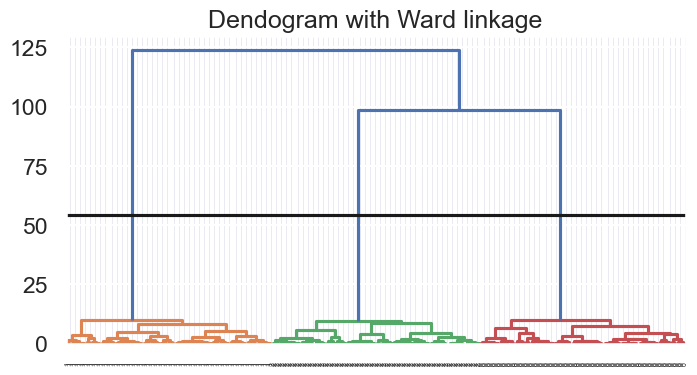

In [26]:
# Dendrogram with threshold such that K=3

ac = AgglomerativeClustering(linkage='ward', n_clusters=K, compute_distances=True)
clusters = ac.fit(data)

children = ac.children_
distances = ac.distances_
n_observations = np.arange(2, children.shape[0]+2)

linkage_matrix = np.c_[children, distances, n_observations]
sch.dendrogram(linkage_matrix, labels=ac.labels_)

# Cutting the dendogram to get K classes
threshold = .5*(ac.distances_[-K]+ac.distances_[-K+1])
plt.axhline(y=threshold, c='k')

plt.title("Dendogram with Ward linkage")
plt.show()

#### Choice of the number of classes $K$

In [34]:
from yellowbrick.cluster import KElbowVisualizer

sns.set_theme()
sns.set_context("talk")

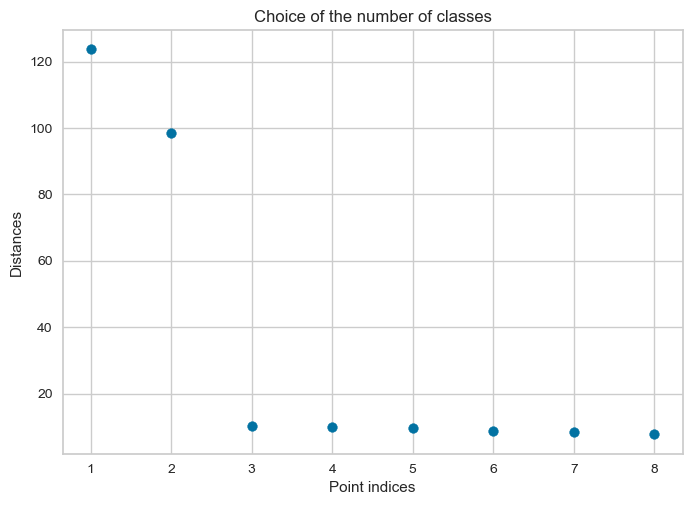

In [31]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
clusters_ac = ac.fit_predict(data)

distances = ac.distances_

n_sizes = 8
x = np.arange(n_sizes, 0, -1)
y = ac.distances_[-n_sizes:]

plt.scatter(x, y)

plt.xlabel('Point indices')
plt.ylabel('Distances')
plt.title("Choice of the number of classes")
plt.show()

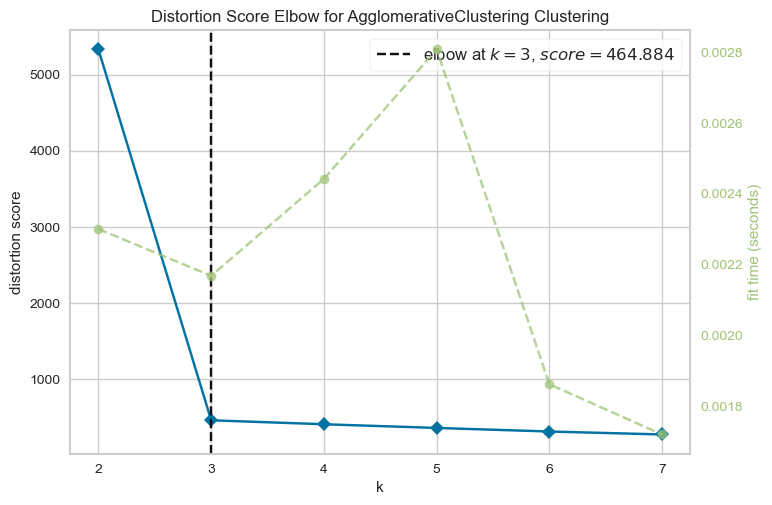

<AxesSubplot: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(2,8))

visualizer.fit(data)
visualizer.show()   